In [1]:
# Simonアルゴリズムを量子回路で構築するコードです。
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import pi
import math
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.visualization import plot_histogram

In [2]:
# 1-to-1オラクル
def one_to_one_oracle (qc, s, n) :
    for i in range(n) :
        if np.random.rand() > 0.5 :
            # NOTゲートを適用する
            qc.x(i)
    # 全量子ビットにCNOTゲートを適用する。
    for i in range(n) :
        qc.cx(i, i+n)
    
# 2-to-1 オラクル
def two_to_one_oracle (qc, s, n) :
    flag = 0
    for i, si, in enumerate(reversed(s)) :
        # CNOTゲートを適用する。
        qc.cx(i, i+n)
        # 値が1だったときに処理する。
        if si == '1' and flag == 0 :
            # NOTゲートを適用する
            qc.x(i)
            for j, sj, in enumerate(reversed(s)) :
                if sj == '1' :
                    qc.cx(i, j+n)
            qc.x(i)
            flag = 1

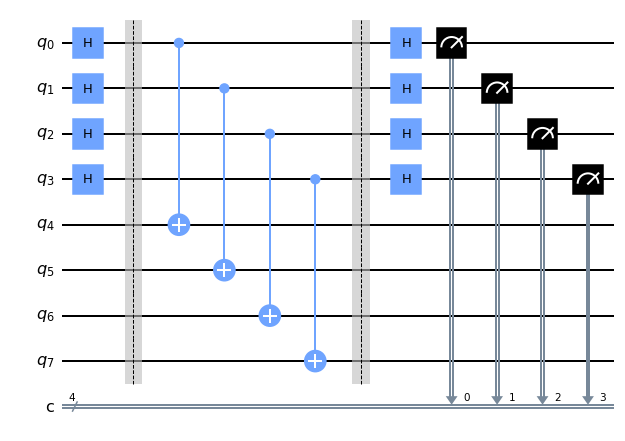

In [11]:
# アルゴリズムの本体
n = 4
N = np.random.randint(1, 2**n-1)
s = bin(N)[2:].zfill(n)

# 量子回路を生成する。
qc = QuantumCircuit(n*2, n)
# 全量子ビットに対してアダマールゲートを適用させる。
for i in range(n) :
    qc.h(i)

qc.barrier()

# オラクルを選択する。
if np.random.rand() > 0.5 :
    two_to_one_oracle(qc, s, n)
    selected = 'two_to_one'
else :
    one_to_one_oracle(qc, s, n)
    selected = 'one_to_one'
    
qc.barrier()
# 全量子ビットに対してアダマールゲートを適用させる。
for i in range(n) :
    qc.h(i)

# 測定する。
for i in range(n) :
    qc.measure(i, i)

# 量子回路を描画する。
qc.draw('mpl')

In [12]:
# マシンを選択して実行する。
backend = Aer.get_backend('qasm_simulator')
# ジョブを実行する
job = execute(qc, backend=backend, shots=1024)
cal_results=job.result()

one_to_one
0001
{'0111': 59, '1001': 56, '0010': 61, '0000': 69, '1010': 82, '1011': 70, '0101': 64, '1000': 72, '0100': 56, '1100': 62, '1110': 54, '0001': 73, '0011': 59, '1111': 65, '1101': 73, '0110': 49}


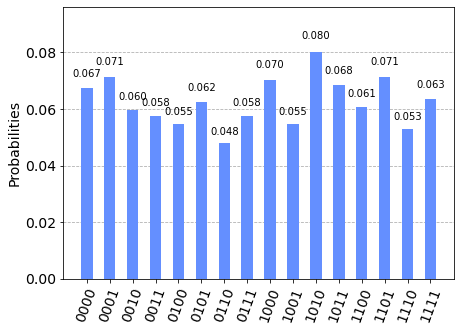

In [13]:
# 結果を取得して描画&プロットする。
answer = cal_results.get_counts()
print(selected)
print(s)
print(answer)
plot_histogram(answer)